## Calibrando todas as imagens selecionadas de Março e Dezembro

Importando as bibliotecas necessárias

In [1]:
import pvlib
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import csv
import scipy.misc
import seaborn as sns
from os import listdir
from PIL import Image
from PIL.ExifTags import TAGS
from sklearn.linear_model import LinearRegression
from pathlib import Path
from os.path import isfile,join
from teste_calibraçao import *
from pvlib import pvsystem,location,modelchain 
from pvlib import solarposition 
import time
from scipy import stats 
from sklearn import datasets, linear_model , metrics
from sklearn import linear_model

Encontrando o ponto de maior brilho solar na imagem e salvando em dataframe

In [2]:
imagens = os.listdir('Imagens_ajuste_r2/')[0:74]
cards = []
def calibra_imagem():
    for nome_da_imagem in imagens:
        im = cv2.imread('Imagens_ajuste_r2/' + nome_da_imagem)
        im = cv2.flip(im,1)
    
        threshold_value = 254
        
        (centroid_x, centroid_y) = where_is_sun(im,threshold_value)


        plt.figure()
        plt.xlabel('Posição em Y')
        plt.ylabel('Posição em X')
        plt.imshow(im[:,:, [2,1,0]])
        cv2.imshow('Imagem espelhada', im)
        plt.scatter(x=[centroid_y], y=[centroid_x], c='r', s=40)
        plt.savefig('Imagens_calibradas_ajuste/' + "calibradas-" + nome_da_imagem)
        #plt.show()
        
        #print ('Note the reference axis definition')
        #print ('X value = ', str(centroid_x))
        #print ('Y value = ', str(centroid_y))
        
        card = {}
        card['num linhas'] = im.shape[0]
        card['num colunas'] = im.shape[1]
        card['num canais'] = im.shape[2]
        card["Endereço da imagem"] = "Calibradas_" + nome_da_imagem
        card["Posição em X"] = centroid_y
        card["Posição em Y"] = centroid_x
        card["Posição em X²"] = (centroid_y)**2
        card['Posição em Y²'] = (centroid_x)**2
        cards.append(card)
    
    
    return calibra_imagem

Sun's location in the image is [ 738 , 767 ]
Sun's location in the image is [ 750 , 707 ]
Sun's location in the image is [ 764 , 635 ]
Sun's location in the image is [ 741 , 712 ]
Sun's location in the image is [ 756 , 637 ]
Sun's location in the image is [ 726 , 767 ]
Sun's location in the image is [ 736 , 703 ]
Sun's location in the image is [ 749 , 632 ]
Sun's location in the image is [ 716 , 699 ]
Sun's location in the image is [ 727 , 622 ]
Sun's location in the image is [ 730 , 569 ]
Sun's location in the image is [ 748 , 517 ]
Sun's location in the image is [ 457 , 660 ]
Sun's location in the image is [ 575 , 602 ]
Sun's location in the image is [ 575 , 526 ]
Sun's location in the image is [ 575 , 464 ]
Sun's location in the image is [ 581 , 387 ]
Sun's location in the image is [ 597 , 270 ]
Sun's location in the image is [ 621 , 199 ]
Sun's location in the image is [ 528 , 652 ]
Sun's location in the image is [ 550 , 590 ]


C:\Users\wendy\AppData\Local\Temp/ipykernel_9300/1390217324.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Sun's location in the image is [ 570 , 533 ]
Sun's location in the image is [ 581 , 463 ]
Sun's location in the image is [ 586 , 391 ]
Sun's location in the image is [ 594 , 309 ]
Sun's location in the image is [ 604 , 234 ]
Sun's location in the image is [ 607 , 149 ]
Sun's location in the image is [ 615 , 125 ]
Sun's location in the image is [ 513 , 718 ]
Sun's location in the image is [ 531 , 653 ]
Sun's location in the image is [ 550 , 592 ]
Sun's location in the image is [ 572 , 537 ]
Sun's location in the image is [ 580 , 467 ]
Sun's location in the image is [ 612 , 351 ]
Sun's location in the image is [ 600 , 300 ]
Sun's location in the image is [ 598 , 199 ]
Sun's location in the image is [ 610 , 149 ]
Sun's location in the image is [ 608 , 129 ]
Sun's location in the image is [ 538 , 644 ]
Sun's location in the image is [ 559 , 585 ]
Sun's location in the image is [ 578 , 530 ]
Sun's location in the image is [ 593 , 461 ]
Sun's location in the image is [ 598 , 389 ]
Sun's loca

<function __main__.calibra_imagem()>

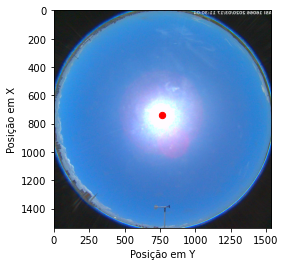

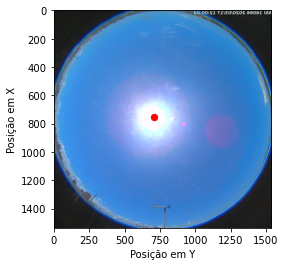

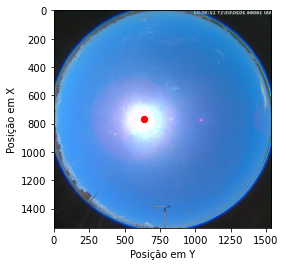

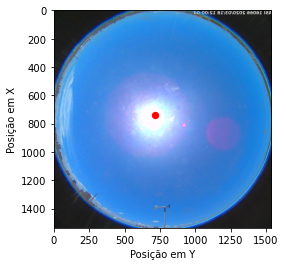

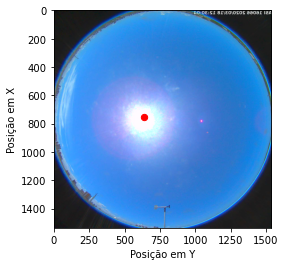

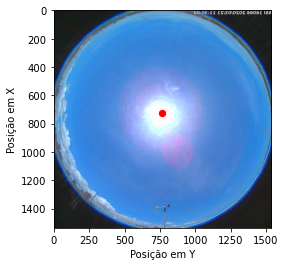

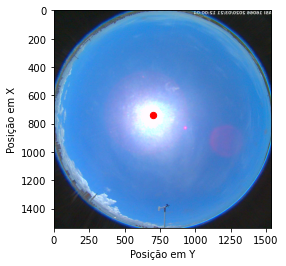

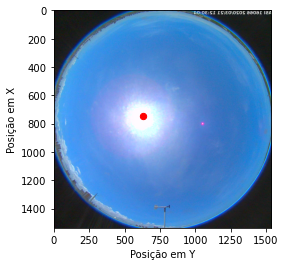

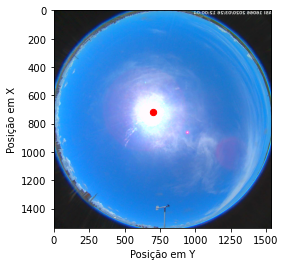

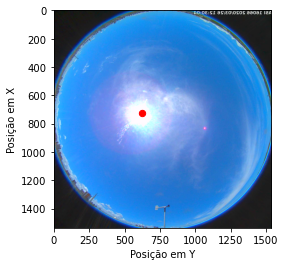

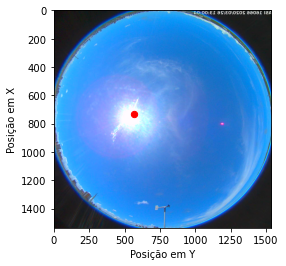

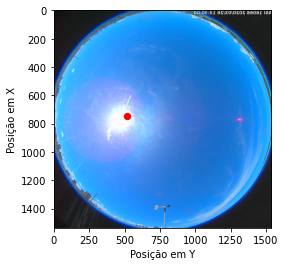

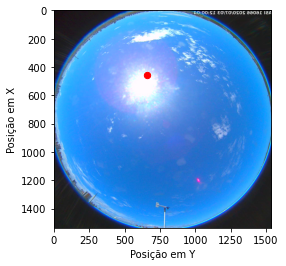

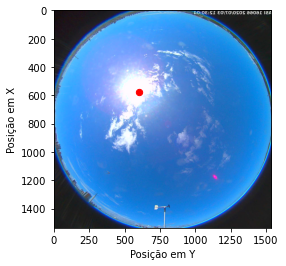

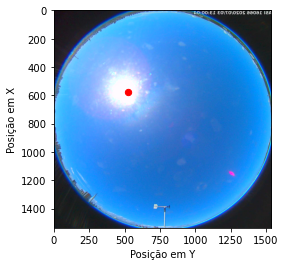

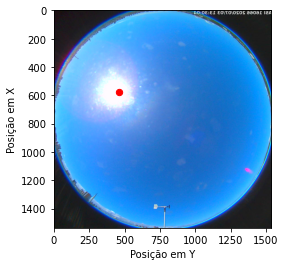

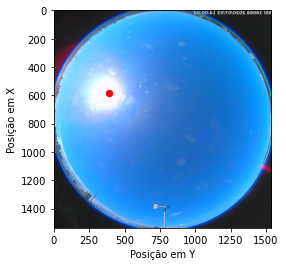

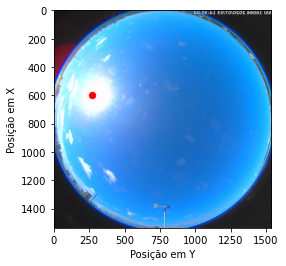

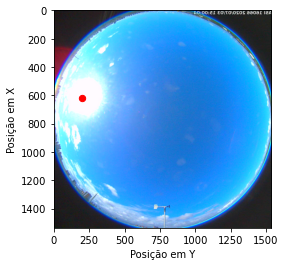

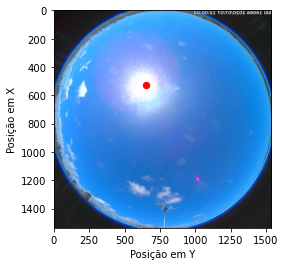

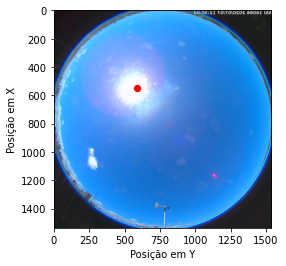

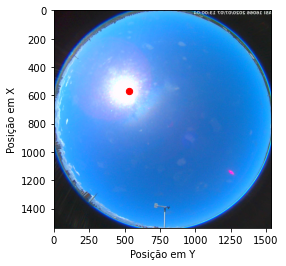

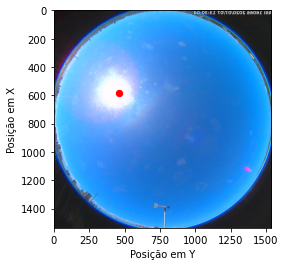

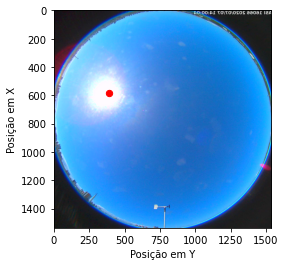

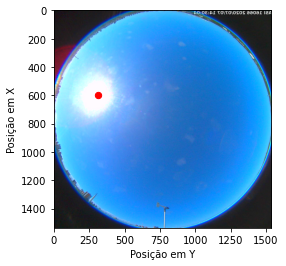

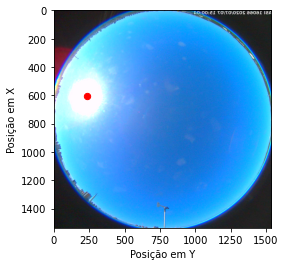

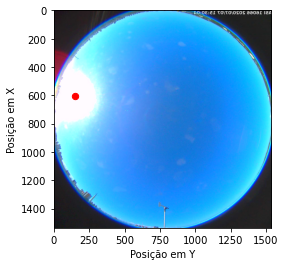

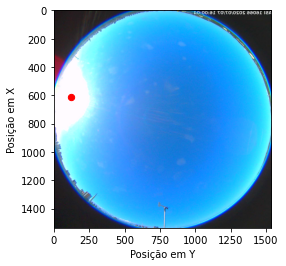

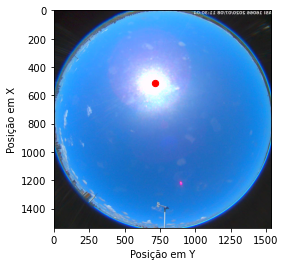

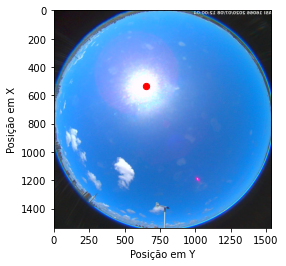

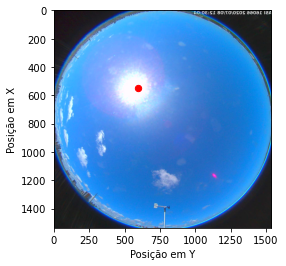

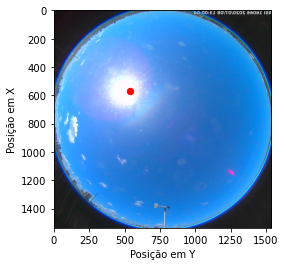

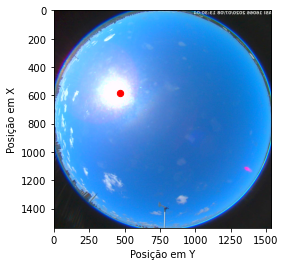

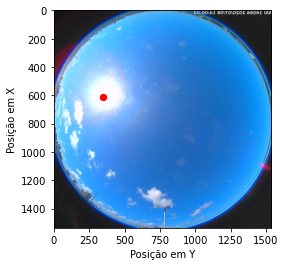

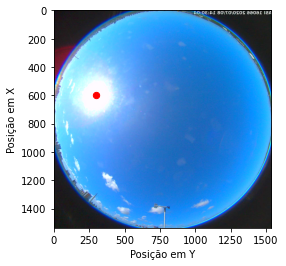

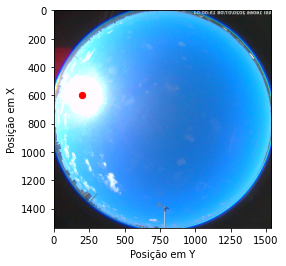

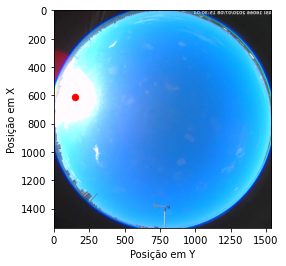

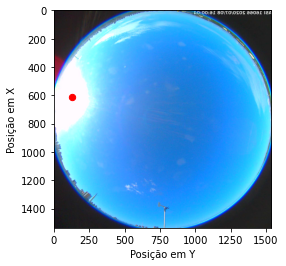

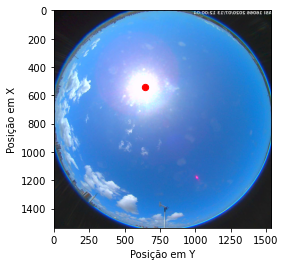

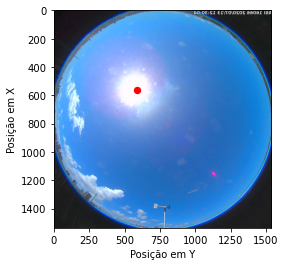

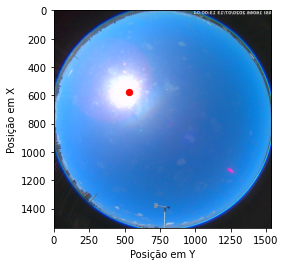

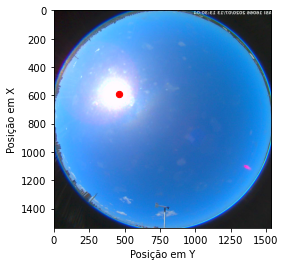

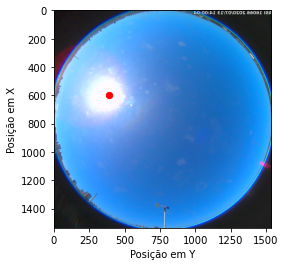

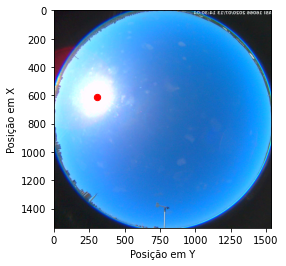

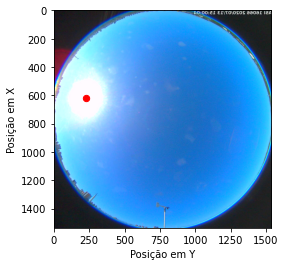

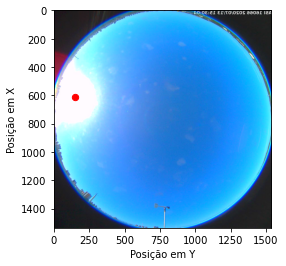

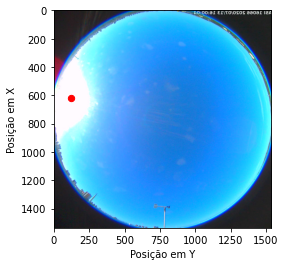

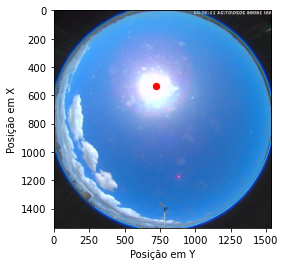

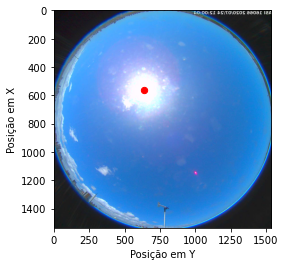

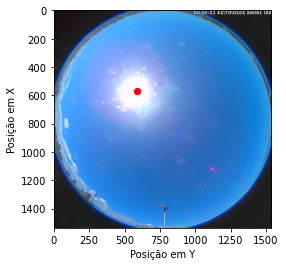

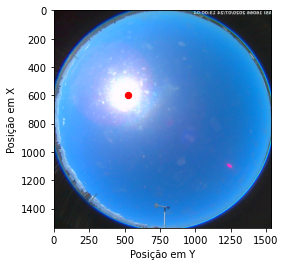

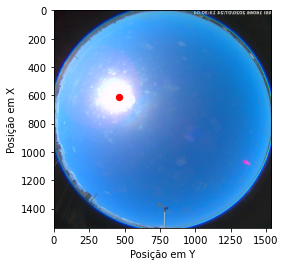

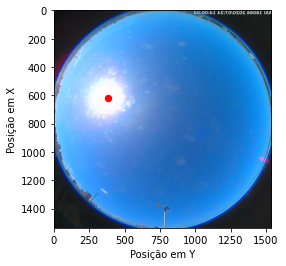

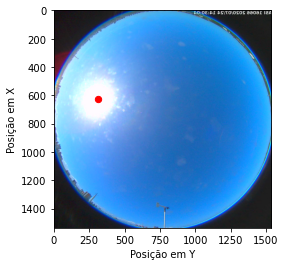

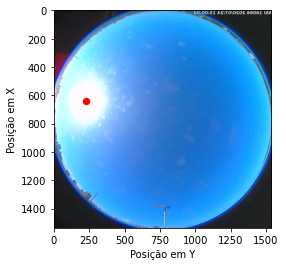

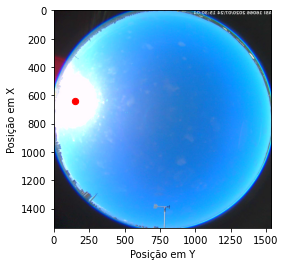

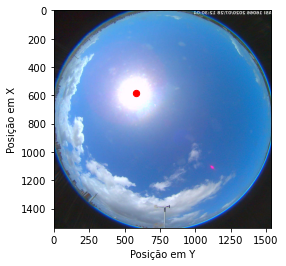

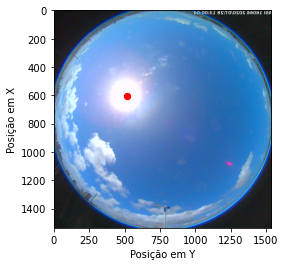

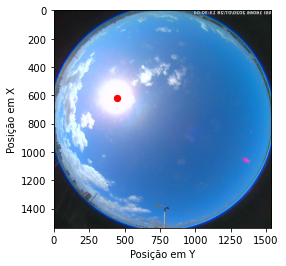

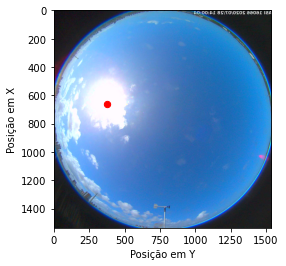

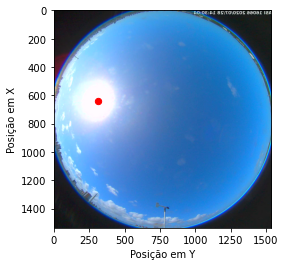

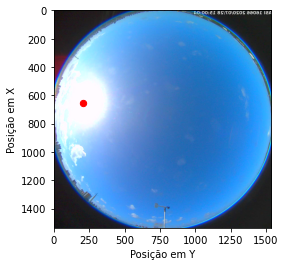

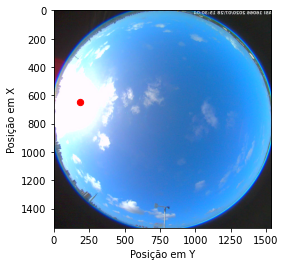

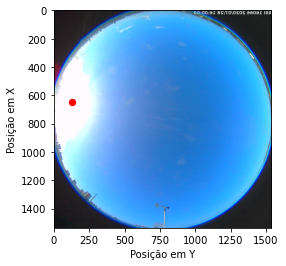

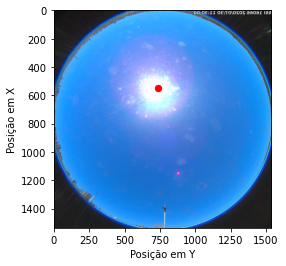

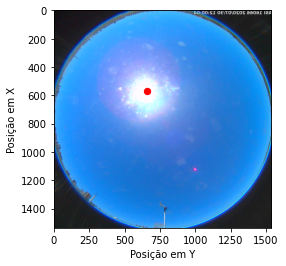

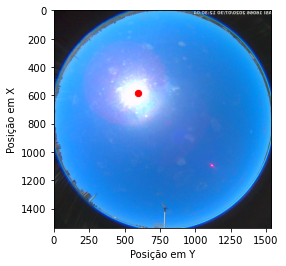

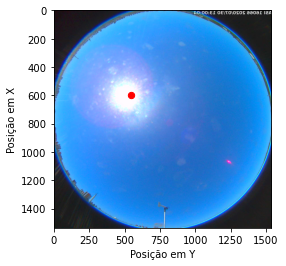

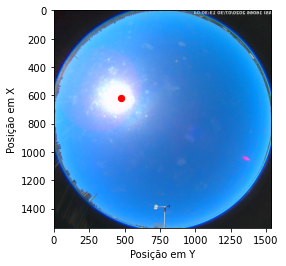

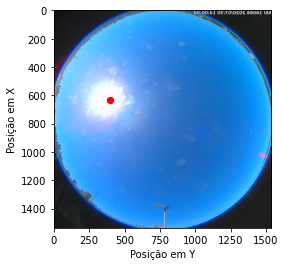

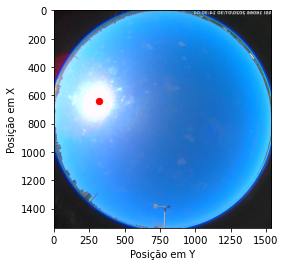

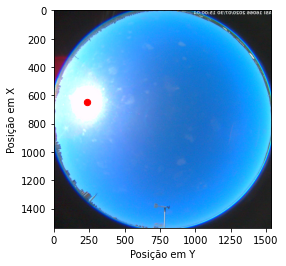

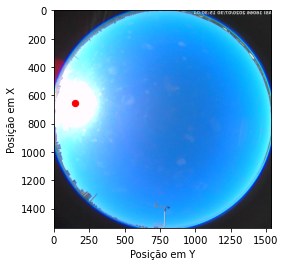

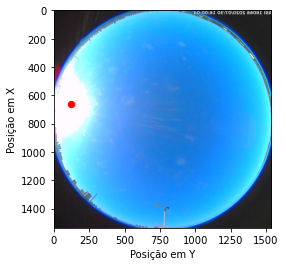

In [3]:
calibra_imagem()

Extraindo a Matriz de cada imagem

In [4]:
df_brilho_sol_ajustado = pd.DataFrame(cards)
df_brilho_sol_ajustado['Posição em X ajustada'] = (df_brilho_sol_ajustado['Posição em X'] - (df_brilho_sol_ajustado['num linhas']/2))
df_brilho_sol_ajustado['Posição em Y ajustada'] = (df_brilho_sol_ajustado['Posição em Y'] - (df_brilho_sol_ajustado['num colunas']/2))
df_brilho_sol_ajustado

num linhas  num colunas  num canais                Endereço da imagem  \
0         1536         1536           3  Calibradas_20200317143000_11.jpg   
1         1536         1536           3  Calibradas_20200317150000_11.jpg   
2         1536         1536           3  Calibradas_20200317153000_11.jpg   
3         1536         1536           3  Calibradas_20200318150000_11.jpg   
4         1536         1536           3  Calibradas_20200318153000_11.jpg   
..         ...          ...         ...                               ...   
69        1536         1536           3  Calibradas_20200730170000_11.jpg   
70        1536         1536           3  Calibradas_20200730173000_11.jpg   
71        1536         1536           3  Calibradas_20200730180000_11.jpg   
72        1536         1536           3  Calibradas_20200730183000_11.jpg   
73        1536         1536           3  Calibradas_20200730190000_11.jpg   

    Posição em X  Posição em Y  Posição em X²  Posição em Y²  \
0            767           738         588289         544644   
1            707           750         499849         562500   
2            635           764         403225         583696   
3            712           741         506944         549081   
4            637           756         405769         571536   
..           ...           ...            ...            ...   
69           394           630         155236         396900   
70           317           637         100489         405769   
71           238           648          56644         419904   
72           149           657          22201         431649   
73           124           661          15376         436921   

    Posição em X ajustada  Posição em Y ajustada  
0                    -1.0                  -30.0  
1                   -61.0                  -18.0  
2                  -133.0                   -4.0  
3                   -56.0                  -27.0  
4                  -131.0                  -12.0  
..                    ...                    ...  
69                 -374.0                 -138.0  
70                 -451.0                 -131.0  
71                 -530.0                 -120.0  
72                 -619.0                 -111.0  
73                 -644.0                 -107.0  

[74 rows x 10 columns]

In [5]:

df_brilho_sol_ajustado.to_csv(r'posiçao_do_sol_manha_tarde_ajustada.csv', index = False)

In [6]:
df_brilho_sol_ajustado

num linhas  num colunas  num canais                Endereço da imagem  \
0         1536         1536           3  Calibradas_20200317143000_11.jpg   
1         1536         1536           3  Calibradas_20200317150000_11.jpg   
2         1536         1536           3  Calibradas_20200317153000_11.jpg   
3         1536         1536           3  Calibradas_20200318150000_11.jpg   
4         1536         1536           3  Calibradas_20200318153000_11.jpg   
..         ...          ...         ...                               ...   
69        1536         1536           3  Calibradas_20200730170000_11.jpg   
70        1536         1536           3  Calibradas_20200730173000_11.jpg   
71        1536         1536           3  Calibradas_20200730180000_11.jpg   
72        1536         1536           3  Calibradas_20200730183000_11.jpg   
73        1536         1536           3  Calibradas_20200730190000_11.jpg   

    Posição em X  Posição em Y  Posição em X²  Posição em Y²  \
0            767           738         588289         544644   
1            707           750         499849         562500   
2            635           764         403225         583696   
3            712           741         506944         549081   
4            637           756         405769         571536   
..           ...           ...            ...            ...   
69           394           630         155236         396900   
70           317           637         100489         405769   
71           238           648          56644         419904   
72           149           657          22201         431649   
73           124           661          15376         436921   

    Posição em X ajustada  Posição em Y ajustada  
0                    -1.0                  -30.0  
1                   -61.0                  -18.0  
2                  -133.0                   -4.0  
3                   -56.0                  -27.0  
4                  -131.0                  -12.0  
..                    ...                    ...  
69                 -374.0                 -138.0  
70                 -451.0                 -131.0  
71                 -530.0                 -120.0  
72                 -619.0                 -111.0  
73                 -644.0                 -107.0  

[74 rows x 10 columns]

In [7]:
len(df_brilho_sol_ajustado)

74

In [8]:
import pytz
pytz.all_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

Organizando os blocos de tempo para todo o período, calculando o zênite e azimute

In [9]:
time_1= pd.date_range(start='2020-03-17 11:30:00', end='2020-03-17 12:30:00', periods=3, tz='America/Fortaleza')
time_2= pd.date_range(start='2020-03-18 12:00:00', end='2020-03-18 12:30:00', periods=2, tz='America/Fortaleza')
time_3= pd.date_range(start='2020-03-21 11:30:00', end='2020-03-21 12:30:00', periods=3, tz='America/Fortaleza')
time_4= pd.date_range(start='2020-03-26 12:00:00', end='2020-03-26 13:30:00', periods=4, tz='America/Fortaleza')
time_5= pd.date_range(start='2020-07-03 12:00:00', end='2020-07-03 15:00:00', periods=7, tz='America/Fortaleza')
time_6= pd.date_range(start='2020-07-07 12:00:00', end='2020-07-07 16:00:00', periods=9, tz='America/Fortaleza')
time_7= pd.date_range(start='2020-07-08 11:30:00', end='2020-07-08 16:00:00', periods=10, tz='America/Fortaleza')
time_8= pd.date_range(start='2020-07-13 12:00:00', end='2020-07-13 16:00:00', periods=9, tz='America/Fortaleza')
time_9= pd.date_range(start='2020-07-24 11:30:00', end='2020-07-24 15:30:00', periods=9, tz='America/Fortaleza')
time_10= pd.date_range(start='2020-07-28 12:30:00', end='2020-07-28 16:00:00', periods=8, tz='America/Fortaleza')
time_11= pd.date_range(start='2020-07-30 11:30:00', end='2020-07-30 16:00:00', periods=10, tz='America/Fortaleza')
#time_14= pd.date_range(start='2020-12-12 12:00:00', end='2020-12-12 16:00:00', periods=9, tz='America/Fortaleza')
#time_15= pd.date_range(start='2020-12-15 12:00:00', end='2020-12-15 16:00:00', periods=9, tz='America/Fortaleza')
#time_16= pd.date_range(start='2020-12-29 12:00:00', end='2020-12-29 16:00:00', periods=9, tz='America/Fortaleza')
#time_17= pd.date_range(start='2020-12-30 12:00:00', end='2020-12-30 15:30:00', periods=8, tz='America/Fortaleza') 

In [10]:
list_times = list([time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,time_11])
len(list_times)

11

In [11]:
list_times

[DatetimeIndex(['2020-03-17 11:30:00-03:00', '2020-03-17 12:00:00-03:00',
                '2020-03-17 12:30:00-03:00'],
               dtype='datetime64[ns, America/Fortaleza]', freq=None),
 DatetimeIndex(['2020-03-18 12:00:00-03:00', '2020-03-18 12:30:00-03:00'], dtype='datetime64[ns, America/Fortaleza]', freq=None),
 DatetimeIndex(['2020-03-21 11:30:00-03:00', '2020-03-21 12:00:00-03:00',
                '2020-03-21 12:30:00-03:00'],
               dtype='datetime64[ns, America/Fortaleza]', freq=None),
 DatetimeIndex(['2020-03-26 12:00:00-03:00', '2020-03-26 12:30:00-03:00',
                '2020-03-26 13:00:00-03:00', '2020-03-26 13:30:00-03:00'],
               dtype='datetime64[ns, America/Fortaleza]', freq=None),
 DatetimeIndex(['2020-07-03 12:00:00-03:00', '2020-07-03 12:30:00-03:00',
                '2020-07-03 13:00:00-03:00', '2020-07-03 13:30:00-03:00',
                '2020-07-03 14:00:00-03:00', '2020-07-03 14:30:00-03:00',
                '2020-07-03 15:00:00-03:00'],
   

No handles with labels found to put in legend.


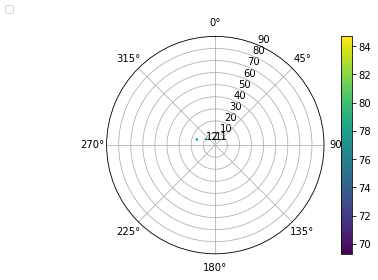

No handles with labels found to put in legend.


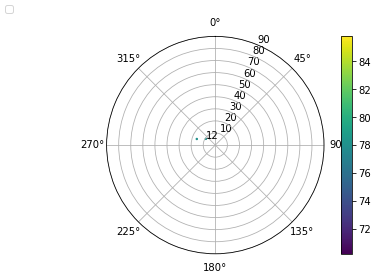

No handles with labels found to put in legend.


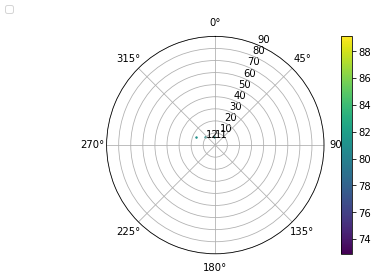

No handles with labels found to put in legend.


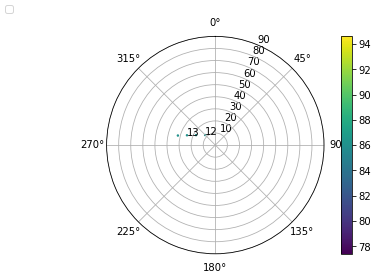

No handles with labels found to put in legend.


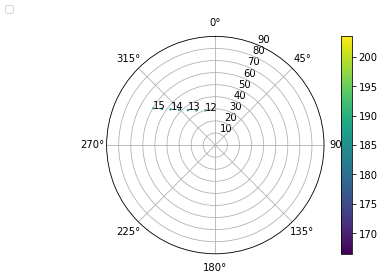

No handles with labels found to put in legend.


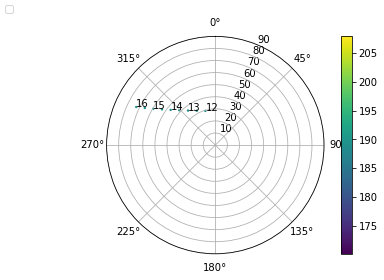

No handles with labels found to put in legend.


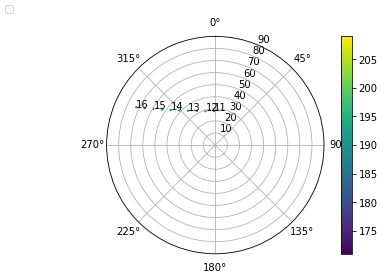

No handles with labels found to put in legend.


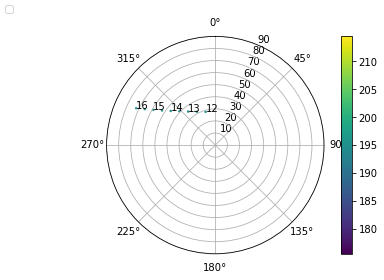

No handles with labels found to put in legend.


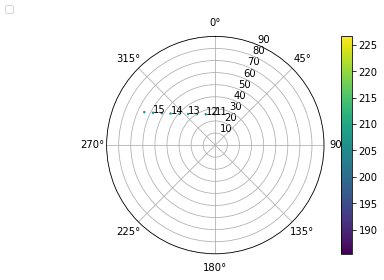

No handles with labels found to put in legend.


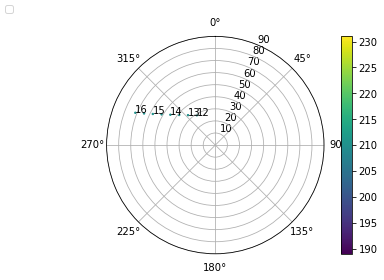

No handles with labels found to put in legend.


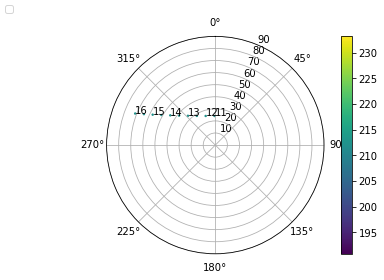

A localização do sol na imagem é:                             apparent_zenith     zenith  apparent_elevation  \
2020-03-17 11:30:00-03:00         4.784596   4.785980           85.215404   
2020-03-17 12:00:00-03:00         9.090186   9.092860           80.909814   
2020-03-17 12:30:00-03:00        15.949686  15.954485           74.050314   
2020-03-18 12:00:00-03:00         9.365683   9.368440           80.634317   
2020-03-18 12:30:00-03:00        16.143732  16.148594           73.856268   
...                                    ...        ...                 ...   
2020-07-30 14:00:00-03:00        44.671363  44.687996           45.328637   
2020-07-30 14:30:00-03:00        51.048242  51.069032           38.951758   
2020-07-30 15:00:00-03:00        57.662065  57.688559           32.337935   
2020-07-30 15:30:00-03:00        64.436233  64.471164           25.563767   
2020-07-30 16:00:00-03:00        71.319038  71.368038           18.680962   

                           elevation    

In [12]:
df_za = pd.DataFrame()
for time in list_times:
    data_az= solarposition.get_solarposition(time, -5.79, -35.21, altitude=0, pressure=101325)
    data_az = data_az.loc[data_az['apparent_elevation'] > 0 ,:]
    ax  = plt.subplot(1,1,1, projection ='polar')

    # draw the analemma loops
    points = ax.scatter(np.radians(data_az.azimuth), data_az.apparent_zenith,
                    s=2, label=None, c=data_az.index.dayofyear)
    ax.figure.colorbar(points)

    # draw hour labels
    for hour in np.unique(data_az.index.hour):
        # choose label position by the smallest radius for each hour 
        subset = data_az.loc[data_az.index.hour == hour, :]
        r = subset.apparent_zenith
        pos = data_az.loc[r.idxmin(), :]
        ax.text(np.radians(pos['azimuth']), pos['apparent_zenith'], str(hour))


    ax.figure.legend(loc='upper left')
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_rmax(90)

    plt.show()

    data_az['time'] = time
    
    df_za = pd.concat([df_za,data_az], axis=0)
    
df_za.to_csv('azimuth_and_zenith_mt_ajustada.csv', index = False) # concatenaçao a cada data_az criado (pd.concat)
print('A localização do sol na imagem é: ' , df_za)


In [13]:
df_za.shape

(74, 7)

In [90]:
df_za['azimuth_convert'] = df_za['azimuth']  - 360
df_za

apparent_zenith     zenith  apparent_elevation  \
2020-03-17 11:30:00-03:00         4.784596   4.785980           85.215404   
2020-03-17 12:00:00-03:00         9.090186   9.092860           80.909814   
2020-03-17 12:30:00-03:00        15.949686  15.954485           74.050314   
2020-03-18 12:00:00-03:00         9.365683   9.368440           80.634317   
2020-03-18 12:30:00-03:00        16.143732  16.148594           73.856268   
...                                    ...        ...                 ...   
2020-07-30 14:00:00-03:00        44.671363  44.687996           45.328637   
2020-07-30 14:30:00-03:00        51.048242  51.069032           38.951758   
2020-07-30 15:00:00-03:00        57.662065  57.688559           32.337935   
2020-07-30 15:30:00-03:00        64.436233  64.471164           25.563767   
2020-07-30 16:00:00-03:00        71.319038  71.368038           18.680962   

                           elevation     azimuth  equation_of_time  \
2020-03-17 11:30:00-03:00  85.214020  357.072178         -8.179851   
2020-03-17 12:00:00-03:00  80.907140  301.489732         -8.173825   
2020-03-17 12:30:00-03:00  74.045515  286.933862         -8.167798   
2020-03-18 12:00:00-03:00  80.631560  303.315361         -7.883290   
2020-03-18 12:30:00-03:00  73.851406  288.207459         -7.877212   
...                              ...         ...               ...   
2020-07-30 14:00:00-03:00  45.312004  303.409775         -6.421519   
2020-07-30 14:30:00-03:00  38.930968  299.137331         -6.420449   
2020-07-30 15:00:00-03:00  32.311441  295.899630         -6.419375   
2020-07-30 15:30:00-03:00  25.528836  293.413771         -6.418295   
2020-07-30 16:00:00-03:00  18.631962  291.492775         -6.417212   

                                               time  azimuth_convert  
2020-03-17 11:30:00-03:00 2020-03-17 11:30:00-03:00        -2.927822  
2020-03-17 12:00:00-03:00 2020-03-17 12:00:00-03:00       -58.510268  
2020-03-17 12:30:00-03:00 2020-03-17 12:30:00-03:00       -73.066138  
2020-03-18 12:00:00-03:00 2020-03-18 12:00:00-03:00       -56.684639  
2020-03-18 12:30:00-03:00 2020-03-18 12:30:00-03:00       -71.792541  
...                                             ...              ...  
2020-07-30 14:00:00-03:00 2020-07-30 14:00:00-03:00       -56.590225  
2020-07-30 14:30:00-03:00 2020-07-30 14:30:00-03:00       -60.862669  
2020-07-30 15:00:00-03:00 2020-07-30 15:00:00-03:00       -64.100370  
2020-07-30 15:30:00-03:00 2020-07-30 15:30:00-03:00       -66.586229  
2020-07-30 16:00:00-03:00 2020-07-30 16:00:00-03:00       -68.507225  

[74 rows x 8 columns]

Organizando as informações do Data Frame

In [91]:
df_brilho_sol_ajustado['hipotenusa'] = (df_brilho_sol_ajustado['Posição em X ajustada'])**2 + (df_brilho_sol_ajustado['Posição em Y ajustada'])**2
df_brilho_sol_ajustado['raiz_hipotenusa'] = df_brilho_sol_ajustado['hipotenusa'] ** 0.5
df_brilho_sol_ajustado['cos_phi'] = df_brilho_sol_ajustado['Posição em X ajustada'] / df_brilho_sol_ajustado['raiz_hipotenusa']
df_brilho_sol_ajustado['cos_phi']
df_brilho_sol_ajustado['sen_phi'] = df_brilho_sol_ajustado['Posição em Y ajustada']/ df_brilho_sol_ajustado['raiz_hipotenusa']
df_brilho_sol_ajustado['sen_phi']
df_brilho_sol_ajustado['tg_phi'] = df_brilho_sol_ajustado['sen_phi'] /df_brilho_sol_ajustado['cos_phi']
df_brilho_sol_ajustado['tg_phi']
arc_tg = np.array(df_brilho_sol_ajustado['tg_phi'])
arc_tg
df_brilho_sol_ajustado['arctg_phi'] = np.arctan(arc_tg) 


In [92]:
#df_brilho_sol['arctg_phi']= df_brilho_sol['arctg_phi'].apply(lambda  x:  0 if x >= 0  else x)
#df_brilho_sol_ajustado=df_brilho_sol_ajustado[df_brilho_sol_ajustado.arctg_phi < 0]

In [93]:
df_brilho_sol_ajustado

num linhas  num colunas  num canais                Endereço da imagem  \
0         1536         1536           3  Calibradas_20200317143000_11.jpg   
1         1536         1536           3  Calibradas_20200317150000_11.jpg   
2         1536         1536           3  Calibradas_20200317153000_11.jpg   
3         1536         1536           3  Calibradas_20200318150000_11.jpg   
4         1536         1536           3  Calibradas_20200318153000_11.jpg   
..         ...          ...         ...                               ...   
69        1536         1536           3  Calibradas_20200730170000_11.jpg   
70        1536         1536           3  Calibradas_20200730173000_11.jpg   
71        1536         1536           3  Calibradas_20200730180000_11.jpg   
72        1536         1536           3  Calibradas_20200730183000_11.jpg   
73        1536         1536           3  Calibradas_20200730190000_11.jpg   

    Posição em X  Posição em Y  Posição em X²  Posição em Y²  \
0            767           738         588289         544644   
1            707           750         499849         562500   
2            635           764         403225         583696   
3            712           741         506944         549081   
4            637           756         405769         571536   
..           ...           ...            ...            ...   
69           394           630         155236         396900   
70           317           637         100489         405769   
71           238           648          56644         419904   
72           149           657          22201         431649   
73           124           661          15376         436921   

    Posição em X ajustada  Posição em Y ajustada  hipotenusa  raiz_hipotenusa  \
0                    -1.0                  -30.0       901.0        30.016662   
1                   -61.0                  -18.0      4045.0        63.600314   
2                  -133.0                   -4.0     17705.0       133.060137   
3                   -56.0                  -27.0      3865.0        62.169124   
4                  -131.0                  -12.0     17305.0       131.548470   
..                    ...                    ...         ...              ...   
69                 -374.0                 -138.0    158920.0       398.647714   
70                 -451.0                 -131.0    220562.0       469.640288   
71                 -530.0                 -120.0    295300.0       543.415127   
72                 -619.0                 -111.0    395482.0       628.873596   
73                 -644.0                 -107.0    426185.0       652.828461   

     cos_phi   sen_phi     tg_phi  arctg_phi  
0  -0.033315 -0.999445  30.000000   1.537475  
1  -0.959115 -0.283017   0.295082   0.286939  
2  -0.999548 -0.030062   0.030075   0.030066  
3  -0.900769 -0.434299   0.482143   0.449260  
4  -0.995831 -0.091221   0.091603   0.091348  
..       ...       ...        ...        ...  
69 -0.938172 -0.346170   0.368984   0.353486  
70 -0.960309 -0.278937   0.290466   0.282687  
71 -0.975313 -0.220826   0.226415   0.222661  
72 -0.984300 -0.176506   0.179321   0.177436  
73 -0.986477 -0.163902   0.166149   0.164645  

[74 rows x 16 columns]

In [94]:
print(df_brilho_sol_ajustado.to_string())

    num linhas  num colunas  num canais                Endereço da imagem  Posição em X  Posição em Y  Posição em X²  Posição em Y²  Posição em X ajustada  Posição em Y ajustada  hipotenusa  raiz_hipotenusa   cos_phi   sen_phi     tg_phi  arctg_phi
0         1536         1536           3  Calibradas_20200317143000_11.jpg           767           738         588289         544644                   -1.0                  -30.0       901.0        30.016662 -0.033315 -0.999445  30.000000   1.537475
1         1536         1536           3  Calibradas_20200317150000_11.jpg           707           750         499849         562500                  -61.0                  -18.0      4045.0        63.600314 -0.959115 -0.283017   0.295082   0.286939
2         1536         1536           3  Calibradas_20200317153000_11.jpg           635           764         403225         583696                 -133.0                   -4.0     17705.0       133.060137 -0.999548 -0.030062   0.030075   0.030066
3   

In [95]:
df_brilho_sol_ajustado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num linhas             74 non-null     int64  
 1   num colunas            74 non-null     int64  
 2   num canais             74 non-null     int64  
 3   Endereço da imagem     74 non-null     object 
 4   Posição em X           74 non-null     int64  
 5   Posição em Y           74 non-null     int64  
 6   Posição em X²          74 non-null     int64  
 7   Posição em Y²          74 non-null     int64  
 8   Posição em X ajustada  74 non-null     float64
 9   Posição em Y ajustada  74 non-null     float64
 10  hipotenusa             74 non-null     float64
 11  raiz_hipotenusa        74 non-null     float64
 12  cos_phi                74 non-null     float64
 13  sen_phi                74 non-null     float64
 14  tg_phi                 74 non-null     float64
 15  arctg_ph

### Regressão Linear

Criando a coluna da posição do sol na imagem e teta/2

In [96]:
zenite = np.array(np.sin((df_za[['zenith']])*np.pi/360))
sol_imagem = np.array(df_brilho_sol_ajustado[['raiz_hipotenusa']])
print(zenite)
print(sol_imagem)

[[0.04175341]
 [0.07926693]
 [0.13877977]
 [0.08166402]
 [0.14045709]
 [0.05567921]
 [0.08930438]
 [0.14588329]
 [0.10311891]
 [0.15603198]
 [0.21503332]
 [0.27556985]
 [0.25804876]
 [0.28196099]
 [0.31613988]
 [0.35716499]
 [0.402364  ]
 [0.44983005]
 [0.49822261]
 [0.25445189]
 [0.27843079]
 [0.31282566]
 [0.35412793]
 [0.39961566]
 [0.44736082]
 [0.49601609]
 [0.54461755]
 [0.59244869]
 [0.24343644]
 [0.2534299 ]
 [0.27744573]
 [0.31191608]
 [0.35330704]
 [0.39888333]
 [0.44671177]
 [0.4954438 ]
 [0.54411577]
 [0.5920119 ]
 [0.24760596]
 [0.27193599]
 [0.30691792]
 [0.34887072]
 [0.39498759]
 [0.44331153]
 [0.49249124]
 [0.54156756]
 [0.58983082]
 [0.22052079]
 [0.23090662]
 [0.25678933]
 [0.29373875]
 [0.33763171]
 [0.3854932 ]
 [0.43533891]
 [0.48583964]
 [0.53606876]
 [0.25045286]
 [0.28842538]
 [0.33326173]
 [0.38193255]
 [0.43245932]
 [0.48353409]
 [0.53425136]
 [0.58394846]
 [0.20874004]
 [0.21983983]
 [0.24715889]
 [0.28570672]
 [0.33106015]
 [0.38016652]
 [0.43105475]
 [0.48

In [97]:
print(sol_imagem)

[[ 30.01666204]
 [ 63.60031446]
 [133.06013678]
 [ 62.16912417]
 [131.54847015]
 [ 42.01190308]
 [ 72.44998275]
 [137.32079231]
 [ 86.40023148]
 [151.64761785]
 [202.59565642]
 [251.79555199]
 [329.21877225]
 [254.56826197]
 [309.53675065]
 [360.09026646]
 [424.41724753]
 [526.54059673]
 [587.68188674]
 [266.5633133 ]
 [281.43915861]
 [307.29301977]
 [357.76249105]
 [418.63229689]
 [490.87371085]
 [558.61614728]
 [639.59518447]
 [660.95234321]
 [259.8557292 ]
 [263.42740936]
 [280.17851452]
 [302.94719012]
 [354.88730606]
 [445.22466239]
 [497.24038452]
 [593.85267533]
 [638.84661696]
 [658.72680225]
 [261.29676615]
 [277.79488836]
 [304.53899586]
 [353.37515476]
 [415.38054841]
 [492.37891913]
 [560.71472247]
 [639.08137197]
 [661.31762414]
 [240.06665741]
 [242.52834886]
 [264.7640459 ]
 [297.13633235]
 [343.95639258]
 [411.75356708]
 [474.1402746 ]
 [553.71924294]
 [632.50375493]
 [266.58019431]
 [297.35668817]
 [353.96751263]
 [407.14125313]
 [475.28202154]
 [575.40594366]
 [597.96

In [98]:
print(zenite)

[[0.04175341]
 [0.07926693]
 [0.13877977]
 [0.08166402]
 [0.14045709]
 [0.05567921]
 [0.08930438]
 [0.14588329]
 [0.10311891]
 [0.15603198]
 [0.21503332]
 [0.27556985]
 [0.25804876]
 [0.28196099]
 [0.31613988]
 [0.35716499]
 [0.402364  ]
 [0.44983005]
 [0.49822261]
 [0.25445189]
 [0.27843079]
 [0.31282566]
 [0.35412793]
 [0.39961566]
 [0.44736082]
 [0.49601609]
 [0.54461755]
 [0.59244869]
 [0.24343644]
 [0.2534299 ]
 [0.27744573]
 [0.31191608]
 [0.35330704]
 [0.39888333]
 [0.44671177]
 [0.4954438 ]
 [0.54411577]
 [0.5920119 ]
 [0.24760596]
 [0.27193599]
 [0.30691792]
 [0.34887072]
 [0.39498759]
 [0.44331153]
 [0.49249124]
 [0.54156756]
 [0.58983082]
 [0.22052079]
 [0.23090662]
 [0.25678933]
 [0.29373875]
 [0.33763171]
 [0.3854932 ]
 [0.43533891]
 [0.48583964]
 [0.53606876]
 [0.25045286]
 [0.28842538]
 [0.33326173]
 [0.38193255]
 [0.43245932]
 [0.48353409]
 [0.53425136]
 [0.58394846]
 [0.20874004]
 [0.21983983]
 [0.24715889]
 [0.28570672]
 [0.33106015]
 [0.38016652]
 [0.43105475]
 [0.48

Plot da primeira regressão

In [99]:
sol_imagem

array([[ 30.01666204],
       [ 63.60031446],
       [133.06013678],
       [ 62.16912417],
       [131.54847015],
       [ 42.01190308],
       [ 72.44998275],
       [137.32079231],
       [ 86.40023148],
       [151.64761785],
       [202.59565642],
       [251.79555199],
       [329.21877225],
       [254.56826197],
       [309.53675065],
       [360.09026646],
       [424.41724753],
       [526.54059673],
       [587.68188674],
       [266.5633133 ],
       [281.43915861],
       [307.29301977],
       [357.76249105],
       [418.63229689],
       [490.87371085],
       [558.61614728],
       [639.59518447],
       [660.95234321],
       [259.8557292 ],
       [263.42740936],
       [280.17851452],
       [302.94719012],
       [354.88730606],
       [445.22466239],
       [497.24038452],
       [593.85267533],
       [638.84661696],
       [658.72680225],
       [261.29676615],
       [277.79488836],
       [304.53899586],
       [353.37515476],
       [415.38054841],
       [492

In [100]:
cards = []
regressao = linear_model.LinearRegression()
regressao.fit(zenite,sol_imagem)
correlacao_zsol = regressao.score(zenite,sol_imagem)
print('o valor da correlação é:', correlacao)
k1 = regressao.coef_
print('o valor do coeficiente, ou seja, k1 é:', k1)
k2 = regressao.intercept_
print('O valor do intercepto, ou seja, k2 é:', k2)

card ={}
card['Correlação'] = correlacao_zsol
card['Coeficiente = K1'] = k1
card['Intercepto = K2'] = k2
cards.append(card)

df_regr_ajustado = pd.DataFrame(cards)
df_regr_ajustado

df_regr_ajustado.to_csv('score_coeficiente_intercepto_mt_ajustada', index = False)


o valor da correlação é: -5490657.7536635855
o valor do coeficiente, ou seja, k1 é: [[1209.92784166]]
O valor do intercepto, ou seja, k2 é: [-45.30422163]


c:\Users\wendy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


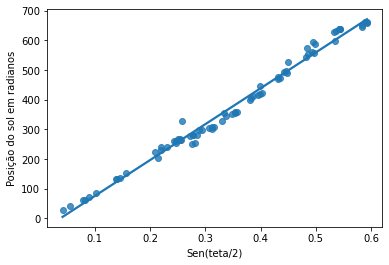

In [101]:
sns.regplot(zenite,sol_imagem, ci=None)

plt.xlabel('Sen(teta/2)')
plt.ylabel('Posição do sol em radianos')
plt.savefig('Regressões/' + "Reg_ajuste_mt_ajustado" )

plt.show()

Calculando o "R"

In [102]:
r = np.array(k1 + zenite + k2)
r
print('O valor de R é: ', r)

O valor de R é:  [[1164.66537345]
 [1164.70288697]
 [1164.76239981]
 [1164.70528406]
 [1164.76407713]
 [1164.67929925]
 [1164.71292442]
 [1164.76950333]
 [1164.72673895]
 [1164.77965202]
 [1164.83865336]
 [1164.89918988]
 [1164.8816688 ]
 [1164.90558103]
 [1164.93975992]
 [1164.98078503]
 [1165.02598404]
 [1165.07345009]
 [1165.12184265]
 [1164.87807192]
 [1164.90205083]
 [1164.9364457 ]
 [1164.97774797]
 [1165.0232357 ]
 [1165.07098086]
 [1165.11963613]
 [1165.16823758]
 [1165.21606873]
 [1164.86705648]
 [1164.87704994]
 [1164.90106577]
 [1164.93553612]
 [1164.97692708]
 [1165.02250337]
 [1165.07033181]
 [1165.11906384]
 [1165.16773581]
 [1165.21563194]
 [1164.87122599]
 [1164.89555603]
 [1164.93053796]
 [1164.97249076]
 [1165.01860762]
 [1165.06693157]
 [1165.11611127]
 [1165.1651876 ]
 [1165.21345086]
 [1164.84414083]
 [1164.85452666]
 [1164.88040937]
 [1164.91735878]
 [1164.96125175]
 [1165.00911324]
 [1165.05895895]
 [1165.10945968]
 [1165.1596888 ]
 [1164.8740729 ]
 [1164.9120454

Organizando informações para o plote da segunda Regressão Linear

gama = alfa - phi //
gama = azimute // 
phi = tg_phi //
alfa = ?? //
alfa = gama + phi

In [103]:
gama_ajustado = np.array(df_za['azimuth_convert'])
print('Os valores de gama são: ', gama_ajustado)
if gama_ajustado.all == 0:
    print('Se os valores de gama forem iguais a 0, gama está rotacionado para o norte' , gama_ajustado)
else:
    print('Gama não está direcionado para o norte e a imagem precisa ser rotacionada') 
phi_ajustado = np.array((df_brilho_sol_ajustado['arctg_phi']*180)/np.pi)#phi 
print('O valores de phi são: ', phi_ajustado) 
alfa_ajustado = gama_ajustado + phi_ajustado
print('Os valores de alfa são: ', alfa_ajustado)

Os valores de gama são:  [ -2.92782233 -58.51026785 -73.06613769 -56.68463885 -71.79254051
  -4.84328899 -51.82766448 -68.15798955 -45.44943899 -62.72099982
 -70.96580465 -75.67351085 -16.22479086 -28.35873867 -38.11679473
 -45.66259843 -51.43068037 -55.84793764 -59.24985076 -16.17101911
 -28.49466942 -38.37230455 -45.98198221 -51.78023306 -56.21005019
 -59.61646236 -62.24757904 -64.27603842  -1.9461318  -16.17392377
 -28.55030911 -38.45956128 -46.08487506 -51.88951429 -56.32114479
 -59.72745937 -62.35798533 -64.38611086 -16.29466413 -28.9664421
 -39.04218708 -46.74151119 -52.56940828 -57.00087538 -60.39848105
 -63.01931434 -65.04056725  -1.43183653 -17.29173365 -30.79099414
 -41.25205918 -49.05996639 -54.86605399 -59.22821768 -62.54874568
 -65.10231455 -31.81219906 -42.40214095 -50.21570726 -55.97863797
 -60.28567103 -63.55451222 -66.06555225 -68.00519498  -1.58726624
 -18.36547491 -32.40312238 -43.05121615 -50.85777584 -56.59022494
 -60.86266861 -64.10037026 -66.58622852 -68.50722472

In [104]:
alfa_ajustado

array([ 85.16302524, -42.06988832, -71.34347561, -30.94393049,
       -66.55867887,  83.79278348, -25.61628647, -60.20490758,
        -8.44691247, -47.0350939 , -60.15504833, -71.11773552,
        54.62478826,  20.94231739,   0.4562894 , -13.25242398,
       -25.28824583, -36.89682458, -44.76433057,  48.0329544 ,
        22.27321948,   1.74361565, -14.46890618, -26.01090543,
       -35.44908531, -42.543897  , -47.66816091, -50.89157204,
        76.96014519,  47.94192756,  22.53438476,   1.85453888,
       -14.09660529, -31.378655  , -36.57430819, -43.09290389,
       -48.03896317, -50.32877175,  45.37487778,  19.82823016,
        -0.4411437 , -17.05696239, -28.41084554, -38.16114615,
       -44.77591439, -48.98307087, -52.28622376,  78.00715278,
        40.85313396,  16.96443056,  -6.11786612, -21.52641822,
       -34.09828571, -42.05441319, -48.86385169, -53.24164891,
        13.0358231 ,  -9.62060571, -25.67797878, -40.3038679 ,
       -44.78737185, -52.12741062, -54.5864953 , -57.49

In [105]:
phi_ajustado

array([88.09084757, 16.44037952,  1.72266207, 25.74070836,  5.23386165,
       88.63607247, 26.21137802,  7.95308197, 37.00252653, 15.68590592,
       10.81075632,  4.55577533, 70.84957911, 49.30105606, 38.57308413,
       32.41017444, 26.14243455, 18.95111305, 14.48552019, 64.20397351,
       50.7678889 , 40.1159202 , 31.51307603, 25.76932762, 20.76096487,
       17.07256536, 14.57941813, 13.38446639, 78.90627699, 64.11585133,
       51.08469387, 40.31410016, 31.98826977, 20.51085928, 19.74683661,
       16.63455548, 14.31902216, 14.05733911, 61.66954191, 48.79467227,
       38.60104337, 29.6845488 , 24.15856274, 18.83972923, 15.62256665,
       14.03624347, 12.75434348, 79.43898931, 58.14486762, 47.7554247 ,
       35.13419306, 27.53354818, 20.76776828, 17.17380448, 13.68489399,
       11.86066564, 44.84802216, 32.78153524, 24.53772848, 15.67477008,
       15.49829918, 11.42710159, 11.47905695, 10.51083151, 82.33804885,
       61.64852506, 47.07387137, 37.96381425, 27.03403753, 20.25

In [106]:
import seaborn as sn

In [107]:
cards = []
regressao_agp = linear_model.LinearRegression()
phi= phi_ajustado.reshape(-1,1)
regressao_agp.fit(phi,gama_ajustado)
correlacao_ajustada = regressao_agp.score(phi,gama_ajustado)
print('o valor da correlação é:', correlacao_ajustada)
coeficiente_ajustado = regressao.coef_
print('o valor do coeficiente é:', coeficiente_ajustado)
intercpto_ajustado = regressao.intercept_
print('O valor do intercepto é:', intercpto_ajustado)

card ={}
card['Correlação'] = correlacao_ajustada
card['Coeficiente'] = coeficiente_ajustado
card['Intercepto'] = intercpto_ajustado
cards.append(card)

df_regr_agp_ajustado = pd.DataFrame(cards)
df_regr_agp_ajustado

df_regr_agp_ajustado.to_csv('score_coeficiente_intercepto_agp_mt_ajustado', index = False)

o valor da correlação é: 0.9832242722335854
o valor do coeficiente é: [[1209.92784166]]
O valor do intercepto é: [-45.30422163]


c:\Users\wendy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


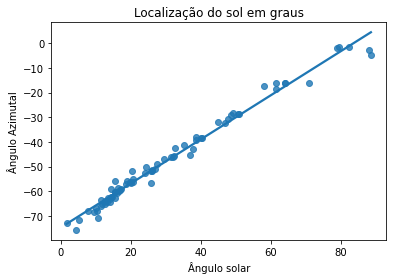

In [108]:
sns.regplot(phi,gama_ajustado,ci=None)

plt.xlabel('Ângulo solar')
plt.ylabel('Ângulo Azimutal')
plt.title('Localização do sol em graus')
plt.savefig('Regressões/' + "Reg_ajuste_agp_mt_ajustado" )

plt.show()